In [1]:
library('dplyr')
library('foreign')
library('caret')
library('klaR')
library('fpc')
library('reshape')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




In [2]:
# 6.1 - IONOSHERE DATA SET
file_path<-'/home/kostas/Documents/Msc/Lessons 1st/Data Mining/Ergasia Filip/mf_lab/ionoshere.txt'
# file_path<-'./ionoshere.txt'
data <- read.arff(file=file_path)

df<- as.data.frame(data)
head(df)
dim(df)

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,⋯,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,⋯,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,⋯,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,⋯,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,⋯,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,⋯,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
6,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,⋯,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


[1] 351  35

In [60]:
k_fold <- function(k) {
    
    # define training control
    train_control <- trainControl(method="cv", number=k)
    
    # Train the model
    model <- train(class ~., data = df, method = "naive_bayes",
               trControl = train_control)
    
    print(model)
    print('----------------------------------------------------')
}

In [65]:
k<-9
resdf<-mutate(df,class= ifelse(class == 'g', 1, 0))
head(resdf)

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,⋯,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,⋯,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,⋯,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,⋯,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,⋯,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,⋯,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
6,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,⋯,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0


In [66]:
for( k in 2:9){
  k_fold (k)
}

Naive Bayes 

351 samples
 34 predictor
  2 classes: 'b', 'g' 

No pre-processing
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 176, 175 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.8887500  0.7585611
   TRUE      0.8973214  0.7804416

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were laplace = 0, usekernel = TRUE
 and adjust = 1.
[1] "----------------------------------------------------"
Naive Bayes 

351 samples
 34 predictor
  2 classes: 'b', 'g' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 234, 234, 234 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.9002849  0.7794570
   TRUE      0.9173789  0.8216084

Tuning parameter 'laplace' was held constant at

In [67]:
# define training control
# train_control <- trainControl(method="cv", number=10)


# # Train the model
# model <- train(class ~., data = df, method = "regLogistic",
#                trControl = train_control)
# # Summarize the results
# print(model)

In [68]:
# 6.2 - VOWEL DATA SET
file_path_vowel<-'/home/kostas/Documents/Msc/Lessons 1st/Data Mining/Ergasia Filip/mf_lab/vowel.txt'
# file_path_vowel<-'./vowel.txt'
vowel <- read.arff(file=file_path_vowel)
head(vowel)

,Train or Test,Speaker Number,Sex,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Class
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Train,Andrew,Male,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,hid
2,Train,Andrew,Male,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,hId
3,Train,Andrew,Male,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,hEd
4,Train,Andrew,Male,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,hAd
5,Train,Andrew,Male,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,hYd
6,Train,Andrew,Male,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365,had


In [69]:
# 6.2.1
colnames(vowel)
names(vowel)[names(vowel) == "Train or Test"] <- "Train_or_Test"
names(vowel)[names(vowel) == "Speaker Number"] <- "Speaker_Number"
# vowel
vowel_s<-dplyr::select(vowel,-(Train_or_Test:Sex))
head(vowel_s) 
# vowel_s

[1] "Train or Test"  "Speaker Number" "Sex"            "Feature 0"     
 [5] "Feature 1"      "Feature 2"      "Feature 3"      "Feature 4"     
 [9] "Feature 5"      "Feature 6"      "Feature 7"      "Feature 8"     
[13] "Feature 9"      "Class"

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,hid
2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,hId
3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,hEd
4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,hAd
5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,hYd
6,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365,had


In [70]:
# 6.2.2

In [71]:
# kvalues<-c(1,2,3,4,5,6,7,8,9,10,11,12)
# kvalues

In [72]:
# for (k in 1:12){
#     print(kmeans(vowel_s[,1:10], k, nstart=100, iter.max=100))
# }

In [73]:
#  kmeansruns to pick the best k
clustering.ch <- kmeansruns(vowel_s[,1:10], krange=1:12, criterion="ch") # Calinski-Harabasz Index 
clustering.ch

K-means clustering with 2 clusters of sizes 413, 577

Cluster means:
  Feature 0 Feature 1  Feature 2  Feature 3  Feature 4 Feature 5  Feature 6
1 -3.655797  2.979123 -0.5181792 0.05628329 -0.5336513 0.5450581  0.1872421
2 -2.880172  1.096305 -0.5003189 0.84416464 -0.1424662 0.6912184 -0.1415113
  Feature 7  Feature 8   Feature 9
1 0.4234576 -0.2700605 -0.19185714
2 0.2743484 -0.3265355  0.01492374

Clustering vector:
  [1] 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2
 [38] 2 1 1 1 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 2 1 1
 [75] 1 1 2 2 2 2 2 1 2 1 1 1 1 2 2 2 2 2 1 2 1 1 1 1 2 2 2 2 2 1 2 1 1 1 1 2 2
[112] 2 2 2 1 2 1 1 1 1 2 2 2 2 2 1 2 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2
[149] 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2
[186] 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 

In [74]:
clustering.asw <- kmeansruns(vowel_s[,1:10], krange=1:12, criterion="asw") # average silhouette width
clustering.asw

K-means clustering with 3 clusters of sizes 387, 381, 222

Cluster means:
  Feature 0 Feature 1   Feature 2    Feature 3  Feature 4 Feature 5
1 -2.512796  1.171351 -0.78869767  0.571152455 -0.3465349 0.7909199
2 -3.647724  3.037609 -0.55267192 -0.005695538 -0.5584173 0.5732992
3 -3.646252  1.136505  0.05901802  1.312891892  0.1993919 0.4478784
     Feature 6  Feature 7  Feature 8  Feature 9
1  0.003633075  0.5343798 -0.2548191 -0.2686641
2  0.233913386  0.4524514 -0.2704882 -0.2282257
3 -0.427243243 -0.2072162 -0.4426802  0.5418964

Clustering vector:
  [1] 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1
 [38] 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 3 1 1 1 2 1 2 2
 [75] 2 2 1 3 1 1 1 2 1 2 2 2 2 1 3 1 1 1 2 1 2 2 2 2 1 3 1 1 1 2 1 2 2 2 2 1 3
[112] 1 1 1 2 1 2 2 2 2 1 3 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1
[149] 1 1 2 3 2 1 1 1 1 1 1 1 3 2 3 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1
[186] 3 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 

             Length Class  Mode   
cluster      990    -none- numeric
centers       20    -none- numeric
totss          1    -none- numeric
withinss       2    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           2    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric
crit          12    -none- numeric
bestk          1    -none- numeric

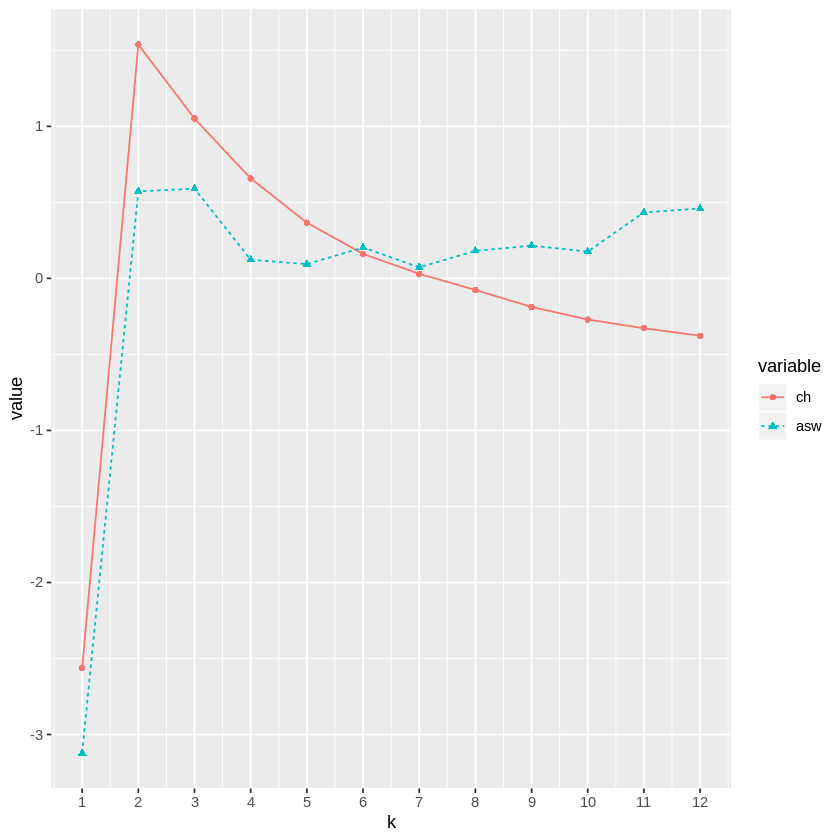

In [76]:
critframe <- data.frame(k=1:12, ch=scale(clustering.ch$crit),asw=scale(clustering.asw$crit))
critframe <- melt(critframe, id.vars=c("k"),variable.name="measure",value.name="score")
# critframe
ggplot(critframe, aes(x=k, y=value, color=variable)) +
geom_point(aes(shape=variable)) + geom_line(aes(linetype=variable)) +
scale_x_continuous(breaks=1:12, labels=1:12)
summary(clustering.ch)

In [77]:
head(vowel_s)

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,hid
2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,hId
3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,hEd
4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,hAd
5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,hYd
6,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365,had


In [78]:
# 6.2.3
class_to_number <- function(name) {
  class_nbr1 <- 
    case_when(
        name == 'hid' ~ 0,
        name == 'hId' ~ 1,
        name == 'hEd' ~ 2,
        name == 'hAd' ~ 3,
        name == 'hYd' ~ 4,
        name == 'had' ~ 5,
        name == 'hOd' ~ 6,
        name == 'hod' ~ 7,
        name == 'hUd' ~ 8,
        name == 'hud' ~ 9,
        name == 'hed' ~ 10
    )
  return(class_nbr1)
}


vowel_s<-mutate(vowel_s,Class= class_to_number(Class))
head(vowel_s)


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0
2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,2
4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,3
5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,4
6,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365,5


In [79]:
#  kmeansruns to pick the best k
clustering.ch <- kmeansruns(vowel_s[,1:11], krange=1:12, criterion="ch") # Calinski-Harabasz Index 
clustering.ch

K-means clustering with 2 clusters of sizes 450, 540

Cluster means:
  Feature 0 Feature 1  Feature 2 Feature 3  Feature 4 Feature 5   Feature 6
1 -3.742858  2.582342 -0.3872778 0.3632444 -0.4603978 0.5915578  0.02329556
2 -2.754476  1.297948 -0.6081796 0.6423481 -0.1767074 0.6624833 -0.02741481
  Feature 7  Feature 8  Feature 9 Class
1 0.5206844 -0.2070133 -0.1337222   8.0
2 0.1831093 -0.3829444 -0.0193537   2.5

Clustering vector:
  [1] 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2
 [38] 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1
 [75] 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2
[112] 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2
[149] 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1
[186] 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2
[223] 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2
[26

In [80]:
clustering.asw <- kmeansruns(vowel_s[,1:11], krange=1:12, criterion="asw") # average silhouette width
clustering.asw

K-means clustering with 2 clusters of sizes 450, 540

Cluster means:
  Feature 0 Feature 1  Feature 2 Feature 3  Feature 4 Feature 5   Feature 6
1 -3.742858  2.582342 -0.3872778 0.3632444 -0.4603978 0.5915578  0.02329556
2 -2.754476  1.297948 -0.6081796 0.6423481 -0.1767074 0.6624833 -0.02741481
  Feature 7  Feature 8  Feature 9 Class
1 0.5206844 -0.2070133 -0.1337222   8.0
2 0.1831093 -0.3829444 -0.0193537   2.5

Clustering vector:
  [1] 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2
 [38] 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1
 [75] 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2
[112] 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2
[149] 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1
[186] 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2
[223] 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2
[26

             Length Class  Mode   
cluster      990    -none- numeric
centers       22    -none- numeric
totss          1    -none- numeric
withinss       2    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           2    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric
crit          12    -none- numeric
bestk          1    -none- numeric

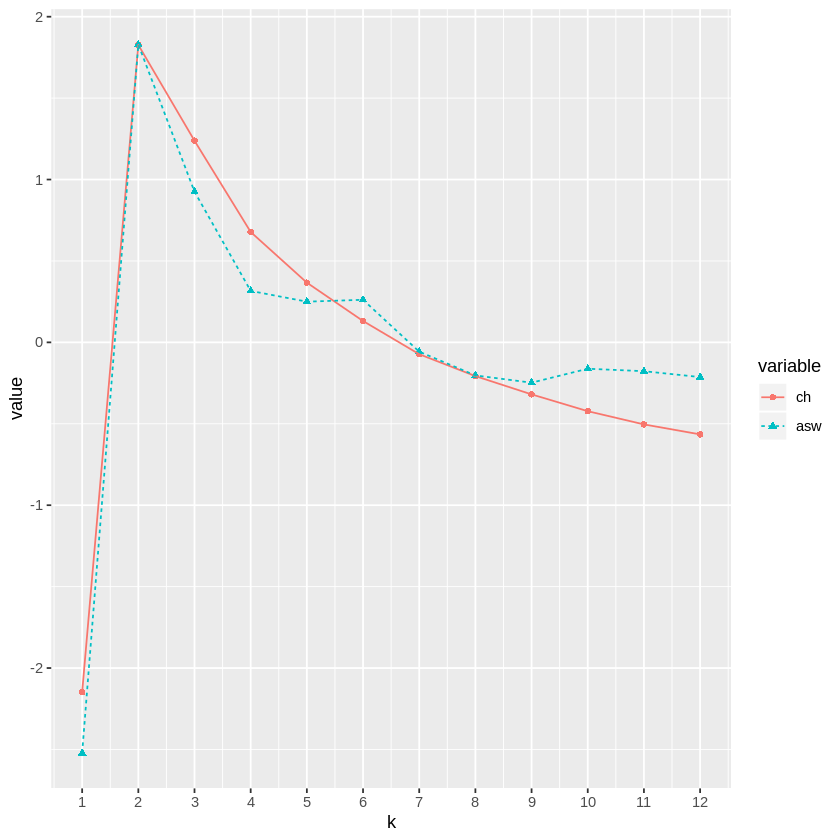

In [82]:
critframe <- data.frame(k=1:12, ch=scale(clustering.ch$crit),asw=scale(clustering.asw$crit))
critframe <- melt(critframe, id.vars=c("k"),variable.name="measure",value.name="score")
# critframe
ggplot(critframe, aes(x=k, y=value, color=variable)) +
geom_point(aes(shape=variable)) + geom_line(aes(linetype=variable)) +
scale_x_continuous(breaks=1:12, labels=1:12)
summary(clustering.ch)

In [91]:
# 6.2.4

#Decision Tree Classification
library(rpart)
set.seed(1234)
dtree <- rpart(Class ~ ., data=vowel_s, method="class",
                parms=list(split="information"))
dtree$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.09555556,0,1.0000000,1.0444444,0.007655769
2,0.07666667,1,0.9044444,0.9522222,0.011922192
3,0.04777778,2,0.8277778,0.8977778,0.013541952
4,0.04666667,3,0.7800000,0.8077778,0.015441340
5,0.04222222,4,0.7333333,0.7611111,0.016141173
6,0.03055556,5,0.6911111,0.7366667,0.016442602
7,0.02333333,7,0.6300000,0.6788889,0.016993393
8,0.02000000,10,0.5600000,0.6088889,0.017379661
9,0.01944444,11,0.5400000,0.5811111,0.017452160
10,0.01444444,13,0.5011111,0.5455556,0.017479577
